# Car Popularity Prediction

### Introduction
A car company has the data for all the cars that are present in the market. They are planning to introduce some new ones of their own, but first, they want to find out what would be the popularity of the new cars in the market based on each car's attributes.

We will provide you a dataset of cars along with the attributes of each car along with its popularity. Your task is to train a model that can predict the popularity of new cars based on the given attributes.


### Features:

    1. buying_price: The buying_price denotes the buying price of the car, and it ranges from [1...4], where buying_price equal to 1 represents the lowest price while buying_price equal to 4 represents the highest price.
    2. maintenance_cost: The maintenance_cost denotes the maintenance cost of the car, and it ranges from [1...4], where maintenance_cost equal to 1 represents the lowest cost while maintenance_cost equal to 4 represents the highest cost.
    3. number_of_doors: The number_of_doors denotes the number of doors in the car, and it ranges from [2...5], where each value of number_of_doors represents the number of doors in the car.
    4. number_of_seats: The number_of_seats denotes the number of seats in the car, and it consists of [2, 4, 5], where each value of number_of_seats represents the number of seats in the car.
    5. luggage_boot_size: The luggage_boot_size denotes the luggage boot size, and it ranges from [1...3], where luggage_boot_size equal to 1 represents smallest luggage boot size while luggage_boot_size equal to 3 represents largest luggage boot size.
    6. safety_rating: The safety_rating denotes the safety rating of the car, and it ranges from [1...3], where safety_rating equal to 1 represents low safety while safety_rating equal to 3 represents high safety.
    7. popularity: The popularity denotes the popularity of the car, and it ranges from [1...4], where popularity equal to 1 represents an unacceptable car, popularity equal to 2 represents an acceptable car, popularity equal to 3 represents a good car, and popularity equal to 4 represents the best car.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import export_graphviz
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('TrainDataset.csv')

In [3]:
df_pred = pd.read_csv('TestDataset.csv')

# Basic Data Understanding

In [4]:
df

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2
...,...,...,...,...,...,...,...
1297,3,2,5,4,2,3,2
1298,3,2,4,2,2,1,1
1299,2,3,3,5,3,1,1
1300,4,4,5,5,1,1,1


### Checking the datatypes of columns present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
buying_price         1302 non-null int64
maintainence_cost    1302 non-null int64
number_of_doors      1302 non-null int64
number_of_seats      1302 non-null int64
luggage_boot_size    1302 non-null int64
safety_rating        1302 non-null int64
popularity           1302 non-null int64
dtypes: int64(7)
memory usage: 71.3 KB


### Checking if there are any null values

In [6]:
df.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
popularity           0
dtype: int64

### Checking for correlation

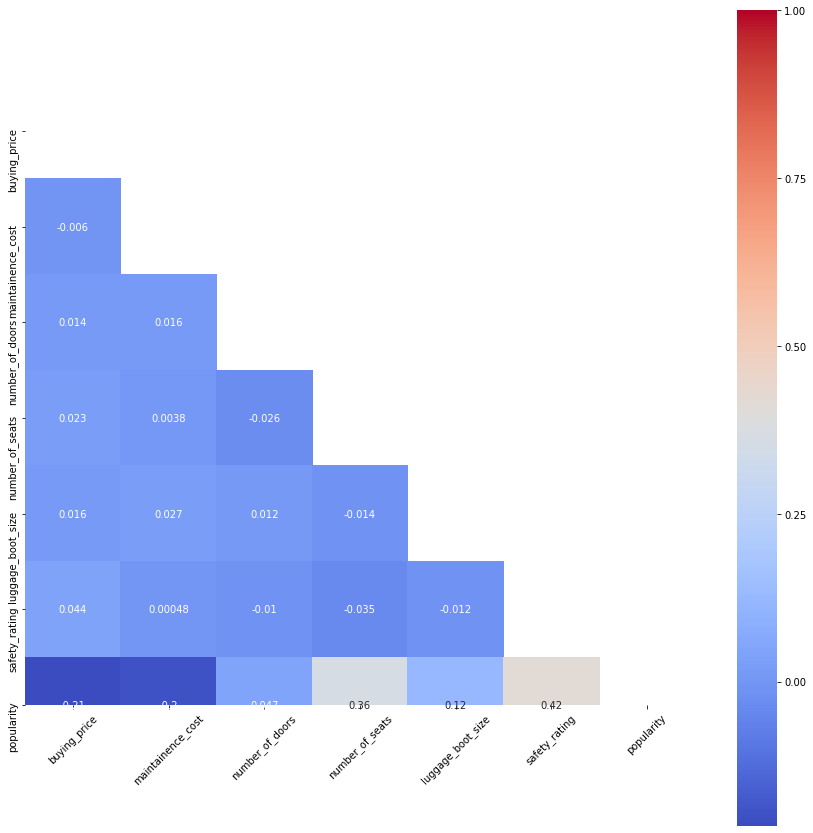

In [7]:
matrix = np.triu(df.corr())
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True, annot=True, cmap="coolwarm", mask=matrix)
plt.xticks(rotation = 45)
plt.show()

***
### Checking the % of popularity amongst the dataset

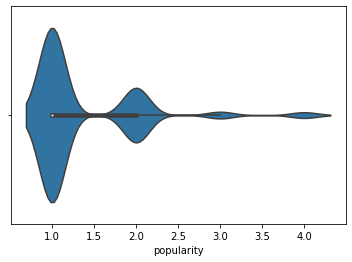

In [8]:
sns.violinplot(df['popularity'])

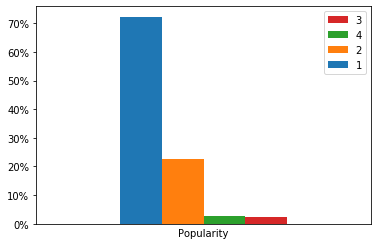

In [9]:
# create dummy variable then group by that
df.assign(dummy = 1).groupby(['dummy','popularity']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('Popularity')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['popularity'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

##### We see here, most of the cars have rating 1, and rating 1 in popularity denotes as an unacceptable car
***
***

### Lets find out how many cars are split accross the dataset depending on maintainance cost

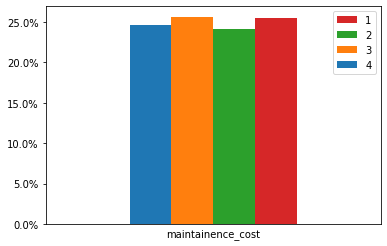

In [10]:
# create dummy variable then group by that
df.assign(dummy = 1).groupby(['dummy','maintainence_cost']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('maintainence_cost')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['maintainence_cost'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Lets find out how many cars are split accross the dataset depending on buying cost

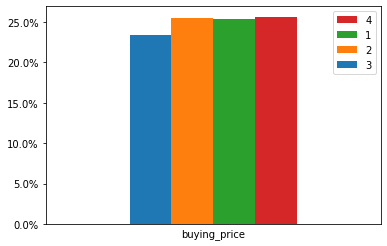

In [11]:
# create dummy variable then group by that
df.assign(dummy = 1).groupby(['dummy','buying_price']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('buying_price')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['buying_price'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

***
### There is a huge difference between buying a car and maintaining it in real life. Lets see what does the dataset explain about this situation and how does popularity relate to that

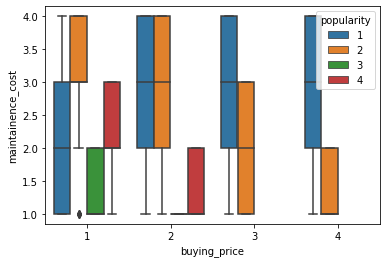

In [12]:
ax = sns.boxplot(x="buying_price", y="maintainence_cost",hue="popularity", data=df)

Analysis of cars based on buying price:
1. Cheap cars(1)[Hatchbacks, Transport Vehicles]: 
    1. Cheap cars with really low popularity(1) have like minimum to medium maintainance(1-3). They can be like transport vehicles which are high mileage low cost cars.(Maruti Ecco)
    2. Cheap cars with low popularity(2) are a on expensive side of maintainance(3-4).They are small cars from overseas brands which have higher aftersales service because the dealers might not have stock for infamous cheap cars.(Datsun Go)
    3. Cheap cars with decent popularity(3) usually have really low maintanance(1-2). Small cars from local brands may not be popular but since they are local brand, their running costs can be low.(Maruti Alto)
    4. Cars that are really popular(4) are moderately expensive to maintain(2-3). The cheap popular cars are from overseas brand which has lower segment cars but since the cars are popular, the local warehouses are stocked with parts and overall maintainance costs are low (Hyundai i10)

2. Affordable cars(2)[Sedans, Crossovers]:
    1. Affordable cars with low - moderately low popularity(1-2) have medium to high running costs(2-4).This may be because the cars have low demands from the market and since they are not cheap, their parts must have some cost to warehouse, as in to maintain it in storage from wear and tear, and this can be the reason the dealers may not have parts availability for such cars(Toyota Yaris, Nissan Sunny)
    2. Affordable cars with decent popularity(3): Affordable costs with decent popularity are the ones which are from local manufacturer and are base trim of a sedan. They are cheap to maintain due to high availability of parts.(Maruti Swift Desire)
    3. Popular afforadable cars(4): These cars are the base level trim of mid tier trim of executive sedans, top tier small sedans or even crossovers. These cars have high demand, and if the cars have same parent company, they tend to share parts which reduce overall cost for the company to maintain stock and have lower cost for after-sales service. And even local brands which have have high sales vehicles in this range offer lower costs for localized production of spares.(Kia Seltos, Hyundai Creta[Kia is parent company of Hyundai Creta], Maruti Ciaz).

3. Expensive cars(3-4)[Executive class vehicles]:
    1. These cars are not popular because they are not affordable to the mass. As a result the demand is quiet less. 
    2. To understand it futher, the cars which not so popular are expnsive to maintain because the technology is advanced on all the spares, like starting from complex tire compounds to specific grade oils, and moreover the scarce supply of parts and goods, most of it is imported which adds import taxes and many other costs like specific tools and specialized mechanics[BMWs, Audis, Mercedes].
    3. The  cars which are expensive to buy but comparative lower maintainance costs are the top tier cars from local brands which build cars depending on the availability of similar parts or the overseas manufacturers which have parts similar to ones from local companies. [Toyota Fortuner, Land Rover Discovery( Discovery Shares parts with Tata Harrier which makes spare parts replacement easier)] 


***
### Checking if no. of doors ie type of car (2 door are coupes, 4 door are hatchbacks or sedans and 5 doors are SUVs) 

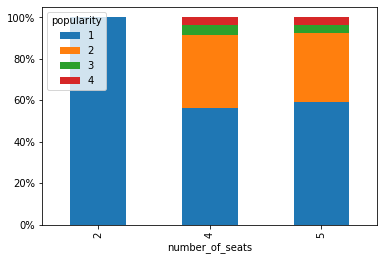

In [13]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['number_of_seats','popularity']).size().groupby(level=0).apply(
lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

Coupes are really not popular, Sedans and SUVs also have very few popular models.


***
### Does safety affect popularity? Are people interested in safety?

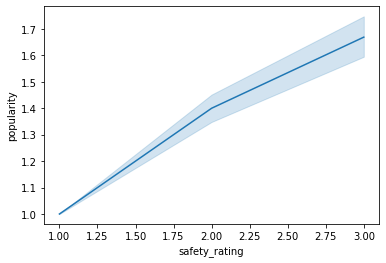

In [14]:
 #ax=sns.lineplot(data=df, x='',y='',hue'')
ax = sns.lineplot(x="safety_rating", y="popularity", data=df)

Yes, people care about safety of the car

***
### Does more luggage mean more sales?

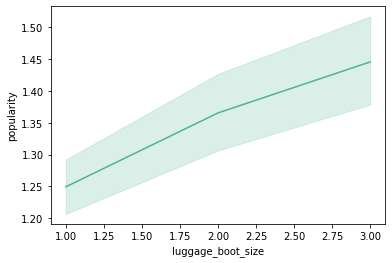

In [15]:
 #ax=sns.lineplot(data=df, x='',y='',hue'')
ax = sns.lineplot(x="luggage_boot_size", y="popularity", data=df, color="#4CB391")

Yes again, safety does matter to customers.


# Building Model

In [16]:
X = df.drop('popularity',axis=1)

In [17]:
y =df['popularity']

In [18]:
X

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,3,4,5,4,2,2
1,2,3,5,4,2,2
2,3,3,3,4,3,2
3,3,2,4,4,2,3
4,1,4,3,5,1,3
...,...,...,...,...,...,...
1297,3,2,5,4,2,3
1298,3,2,4,2,2,1
1299,2,3,3,5,3,1
1300,4,4,5,5,1,1


In [19]:
y

0       1
1       2
2       2
3       2
4       2
       ..
1297    2
1298    1
1299    1
1300    1
1301    1
Name: popularity, Length: 1302, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=100)

***
## Logistics Regression

In [21]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train,y_train)
lr_test_pred = lr.predict(X_test)
lr_train_pred = lr.predict(X_train)

In [23]:
print('Report:\n',classification_report(y_test, lr_test_pred))
print('Confustion Matrix:\n',confusion_matrix(y_test,lr_test_pred),'\n')
print('Cross Validation:', cross_val_score(lr, X, y, cv=5),'\n')
print("\n Accuracy: ", accuracy_score(y_test,lr_test_pred))
print('\n The Training data f1 Score is', f1_score(lr_train_pred, y_train,average='macro'))
print('\n The Testing data f1 Score is', f1_score(lr_test_pred, y_test,average='macro'))

Report:
               precision    recall  f1-score   support

           1       0.86      0.96      0.91       280
           2       0.67      0.55      0.60        93
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         7

    accuracy                           0.82       391
   macro avg       0.47      0.40      0.41       391
weighted avg       0.79      0.82      0.80       391

Confustion Matrix:
 [[269  10   0   1]
 [ 40  51   2   0]
 [  2   8   1   0]
 [  0   7   0   0]] 

Cross Validation: [0.82509506 0.81538462 0.83076923 0.81923077 0.82239382] 


 Accuracy:  0.8209718670076727

 The Training data f1 Score is 0.41063409424538816

 The Testing data f1 Score is 0.4141822319292058


***
## Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_test_predict = rf.predict(X_test)
rf_train_predict = rf.predict(X_train)

In [27]:
print("\n Confusion Matrix\n", confusion_matrix(y_test,rf_test_predict))
print("\n Classification Report\n", classification_report(y_test,rf_test_predict))
print("\n Accuracy \n", accuracy_score(y_test,rf_test_predict))
cv_avg_scr = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross Validation Score: ", cv_avg_scr.mean())
#A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).
print('The Training data f1 Score is', f1_score(rf_train_predict, y_train, average='macro'))
print('The Testing data f1 Score is', f1_score(rf_test_predict, y_test, average='macro'))


 Confusion Matrix
 [[279   1   0   0]
 [  4  87   2   0]
 [  0   0  11   0]
 [  0   2   1   4]]

 Classification Report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       280
           2       0.97      0.94      0.95        93
           3       0.79      1.00      0.88        11
           4       1.00      0.57      0.73         7

    accuracy                           0.97       391
   macro avg       0.93      0.88      0.89       391
weighted avg       0.98      0.97      0.97       391


 Accuracy 
 0.9744245524296675
Cross Validation Score:  0.9604865468425402
The Training data f1 Score is 1.0
The Testing data f1 Score is 0.887302851183118


###### We see here the model is overfitting since f1 score is 1

****
***
## Random Forest Hyperparameter Tuning using Decision Tree Classifier

In [28]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [29]:
rf.feature_importances_

array([0.14305143, 0.14133939, 0.0694678 , 0.26160046, 0.08830079,
       0.29624013])

In [30]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1910378596, splitter='best')

In [31]:
type(rf.estimators_[0])

sklearn.tree.tree.DecisionTreeClassifier

In [32]:
rf_tree = rf.estimators_[15]
decision_tree =tree.DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
rf_dt_test = decision_tree.predict(X_test)
rf_dt_train = decision_tree.predict(X_train)


In [34]:
print("Classification Report:\n\n", classification_report(y_test, rf_dt_test))
print("Confusion Matrix:\n\n",confusion_matrix(y_test,rf_dt_test))
print("\n Accuracy: ", accuracy_score(y_test,rf_dt_test))
#A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).
print('The Training data f1 Score is', f1_score(rf_dt_train, y_train, average='macro'))
print('The Testing data f1 Score is', f1_score(rf_dt_test, y_test, average='macro'))


Classification Report:

               precision    recall  f1-score   support

           1       0.96      0.96      0.96       280
           2       0.84      0.86      0.85        93
           3       0.67      0.55      0.60        11
           4       1.00      0.86      0.92         7

    accuracy                           0.93       391
   macro avg       0.87      0.81      0.83       391
weighted avg       0.93      0.93      0.93       391

Confusion Matrix:

 [[270   9   1   0]
 [ 11  80   2   0]
 [  0   5   6   0]
 [  0   1   0   6]]

 Accuracy:  0.9258312020460358
The Training data f1 Score is 0.8556538421777448
The Testing data f1 Score is 0.8341768994459857


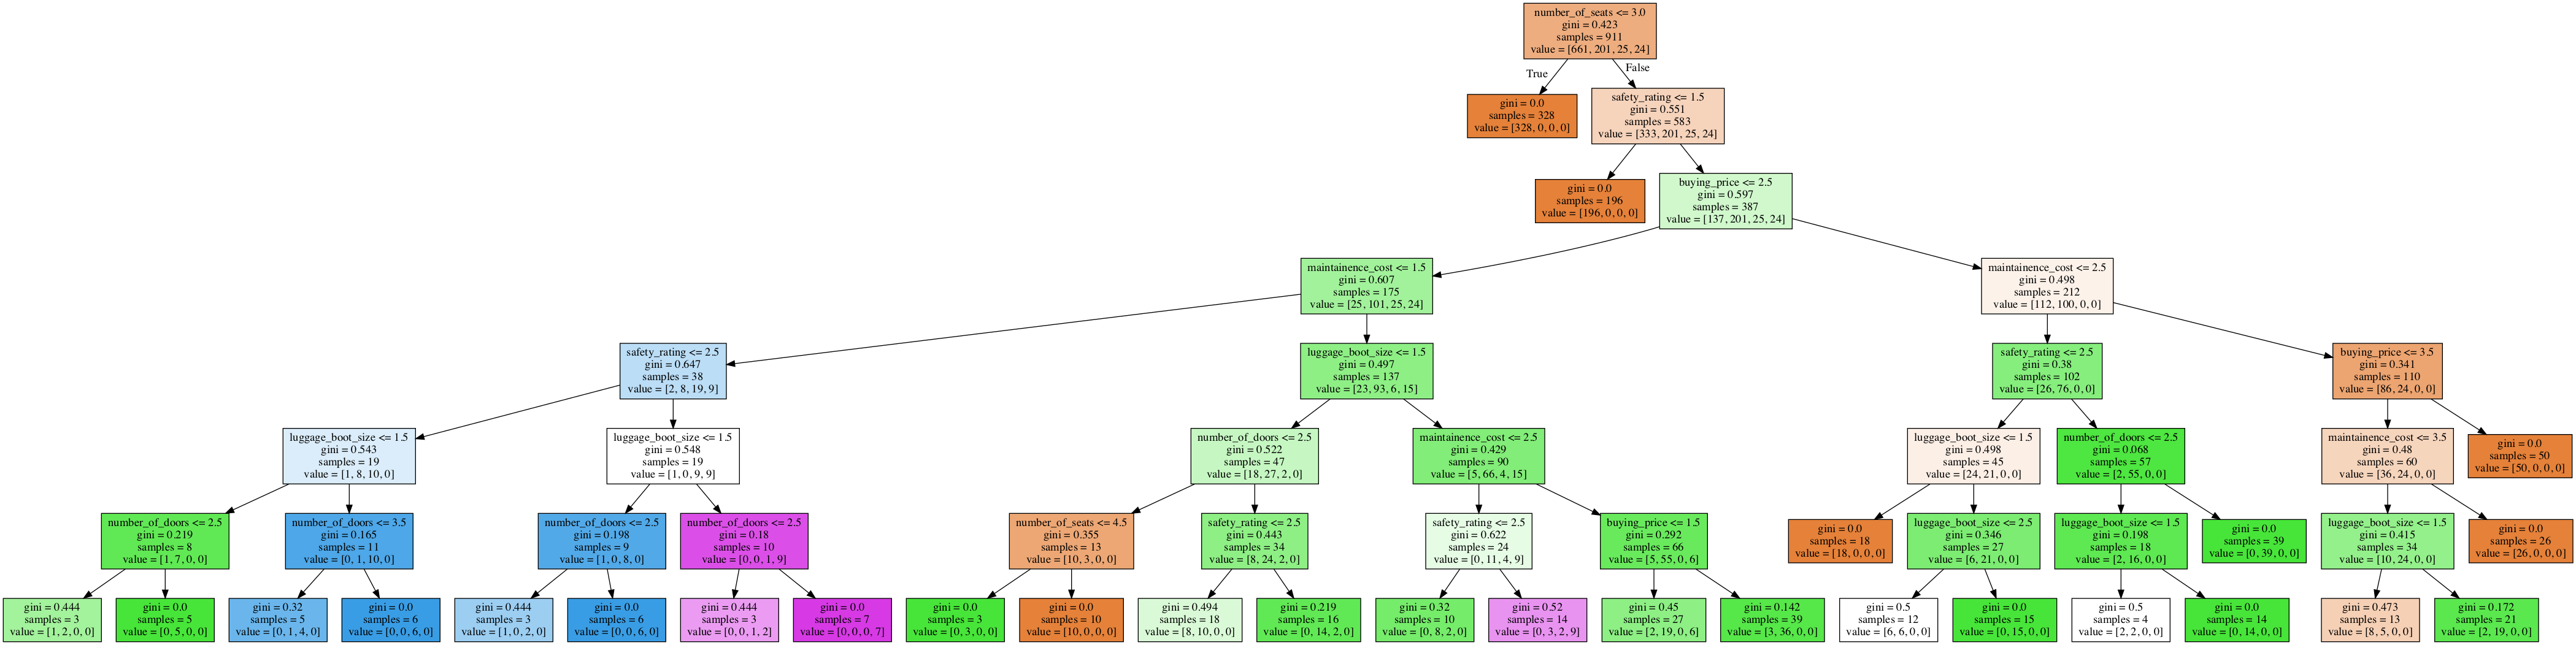

In [35]:
col = list(df.columns[:-1])
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data, feature_names=col, filled=True)
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(tree.create_png())

***
## Finding Right Parameter for Hyperparameter tuning
### 1. Max Depth

In [36]:
parameters = {'max_depth': [6,7,8,9,15]}
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
tree = GridSearchCV(dtree, parameters, cv=5,return_train_score=True)
tree.fit(X_train, y_train)
dep_als = tree.cv_results_
pd.DataFrame(dep_als)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002656,0.000453,0.000936,0.000047,6,{'max_depth': 6},0.891304,0.895604,0.884615,0.928571,...,0.896817,0.016443,5,0.920220,0.923182,0.924554,0.936900,0.923288,0.925629,0.005812
1,0.002727,0.000737,0.001271,0.000516,7,{'max_depth': 7},0.945652,0.912088,0.928571,0.879121,...,0.908891,0.026711,4,0.949106,0.943759,0.941015,0.953361,0.952055,0.947859,0.004756
2,0.001939,0.000187,0.000767,0.000066,8,{'max_depth': 8},0.940217,0.934066,0.956044,0.928571,...,0.934138,0.014506,3,0.969739,0.962963,0.962963,0.972565,0.973973,0.968440,0.004676
3,0.001832,0.000121,0.000714,0.000014,9,{'max_depth': 9},0.945652,0.945055,0.945055,0.934066,...,0.940724,0.005573,2,0.984869,0.980796,0.979424,0.989026,0.983562,0.983535,0.003357
4,0.001685,0.000012,0.000683,0.000005,15,{'max_depth': 15},0.951087,0.950549,0.967033,0.950549,...,0.950604,0.010523,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


##### Max_depth = 9 looks like a good fit
***
### Finding Minimum Sample Leaf

In [37]:
parameters = {'min_samples_leaf': [0.5,2,3,5,10]}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, cv=5, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)
min_leaf = tree.cv_results_
pd.DataFrame(min_leaf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002012,0.000100,0.000850,0.000050,0.5,{'min_samples_leaf': 0.5},0.722826,0.725275,0.725275,0.725275,...,0.725576,0.002076,5,0.726272,0.725652,0.725652,0.725652,0.724658,0.725577,0.000519
1,0.002780,0.000485,0.000930,0.000079,2,{'min_samples_leaf': 2},0.956522,0.923077,0.934066,0.928571,...,0.933041,0.012524,2,0.983494,0.984911,0.984911,0.982167,0.984932,0.984083,0.001105
2,0.001864,0.000142,0.000766,0.000104,3,{'min_samples_leaf': 3},0.934783,0.928571,0.956044,0.945055,...,0.938529,0.010665,1,0.966988,0.978052,0.965706,0.973937,0.978082,0.972553,0.005302
3,0.001723,0.000056,0.000705,0.000052,5,{'min_samples_leaf': 5},0.961957,0.945055,0.934066,0.917582,...,0.931943,0.021311,3,0.962861,0.961591,0.949246,0.958848,0.957534,0.958016,0.004777
4,0.001747,0.000093,0.000694,0.000026,10,{'min_samples_leaf': 10},0.929348,0.923077,0.895604,0.879121,...,0.899012,0.024113,4,0.933975,0.928669,0.921811,0.932785,0.936986,0.930845,0.005246


##### Minimum Sample Leaf of 2 seems to be good option
***
### Finding Minimum sample split

In [38]:
n_folds = 5
parameters = {'min_samples_split': [0.5,2,5,10,15,20]}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)
sample_split = tree.cv_results_
pd.DataFrame(sample_split)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002196,0.000235,0.000901,0.000049,0.5,{'min_samples_split': 0.5},0.788043,0.791209,0.796703,0.813187,...,0.795829,0.009137,6,0.797799,0.796982,0.795610,0.791495,0.797260,0.795829,0.002284
1,0.002457,0.000188,0.001049,0.000209,2,{'min_samples_split': 2},0.951087,0.950549,0.967033,0.950549,...,0.950604,0.010523,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002146,0.000344,0.000794,0.000093,5,{'min_samples_split': 5},0.929348,0.939560,0.939560,0.934066,...,0.934138,0.004842,3,0.979367,0.983539,0.980796,0.986283,0.983562,0.982709,0.002409
3,0.002013,0.000257,0.000915,0.000359,10,{'min_samples_split': 10},0.961957,0.928571,0.950549,0.928571,...,0.936334,0.017849,2,0.962861,0.967078,0.962963,0.968450,0.964384,0.965147,0.002246
4,0.001949,0.000193,0.000757,0.000042,15,{'min_samples_split': 15},0.945652,0.934066,0.923077,0.879121,...,0.915477,0.024731,4,0.949106,0.951989,0.942387,0.934156,0.956164,0.946761,0.007736
5,0.001917,0.000210,0.000780,0.000097,20,{'min_samples_split': 20},0.940217,0.912088,0.917582,0.879121,...,0.903403,0.026538,5,0.936726,0.930041,0.938272,0.934156,0.936986,0.935236,0.002921


##### Minimum Sample Split of 2 Seems to fit
***
## Trying Random Forest with the following parameters

In [39]:
rf = RandomForestClassifier(n_estimators=100,bootstrap=True, class_weight=None, criterion='gini',max_depth=9, max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=None, oob_score=False, random_state=None,verbose=0, warm_start=False)

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfp_test_predict = rf.predict(X_test)
rfp_train_predict = rf.predict(X_train)
cv_score = cross_val_score(rf, X_train, y_train, cv=5)

In [42]:
print("Confusion Matrix: \n", confusion_matrix(y_test,rfp_test_predict))
print("\nClassification Report: \n",classification_report(y_test,rfp_test_predict))
print("Cross Validation Score: ", cv_score.mean())
print('\nTraining Dataset f1 Score: ', f1_score(rfp_train_predict, y_train, average='macro'))
print('\nTesting Dataset f1 Score: ', f1_score(rfp_test_predict, y_test, average='macro'))
print('\nAccuracy: ', accuracy_score(y_test,rfp_test_predict))


Confusion Matrix: 
 [[277   2   1   0]
 [  4  87   2   0]
 [  0   1  10   0]
 [  0   2   1   4]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       280
           2       0.95      0.94      0.94        93
           3       0.71      0.91      0.80        11
           4       1.00      0.57      0.73         7

    accuracy                           0.97       391
   macro avg       0.91      0.85      0.86       391
weighted avg       0.97      0.97      0.97       391

Cross Validation Score:  0.9549679542172937

Training Dataset f1 Score:  0.9862885927166287

Testing Dataset f1 Score:  0.8638338873632991

Accuracy:  0.9667519181585678


***
## GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10],
    'max_features': [3,5],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2],
    'n_estimators': [10, 20, 30]
}

In [47]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [48]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    5.5s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [49]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [50]:
classifier_rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=10, max_features=5, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,oob_score=False, random_state=100, verbose=0,warm_start=False)

In [51]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [53]:
gs_rf_test = classifier_rf.predict(X_test)
gs_rf_train = classifier_rf.predict(X_train)

In [54]:
print("Confusion Matrix: \n", confusion_matrix(y_test,gs_rf_test))
print("\nClassification Report: \n",classification_report(y_test,gs_rf_test))
cv_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross Validation Score: ", cv_score.mean())
print('\nTraining Dataset f1 Score: ', f1_score(gs_rf_train, y_train, average='macro'))
print('\nTesting Dataset f1 Score: ', f1_score(gs_rf_test, y_test, average='macro'))
print('\nAccuracy: ', accuracy_score(y_test,gs_rf_test))

Confusion Matrix: 
 [[278   1   1   0]
 [  3  86   3   1]
 [  0   0  11   0]
 [  0   0   0   7]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       280
           2       0.99      0.92      0.96        93
           3       0.73      1.00      0.85        11
           4       0.88      1.00      0.93         7

    accuracy                           0.98       391
   macro avg       0.90      0.98      0.93       391
weighted avg       0.98      0.98      0.98       391

Cross Validation Score:  0.9582587842136243

Training Dataset f1 Score:  0.9975712061131221

Testing Dataset f1 Score:  0.9315325197678139

Accuracy:  0.9769820971867008


## Gradient Boosting

In [55]:
gb = GradientBoostingClassifier(max_depth=1, n_estimators=100)

In [56]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
gb.estimators_[1][2]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=RandomState(MT19937) at 0x10B4E09E0,
                      splitter='best')

### Visualizing the tree from gradient boosting

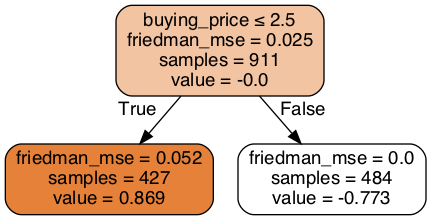

In [58]:
dot_data = StringIO()  
export_graphviz(gb.estimators_[3][3],out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=col )
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(tree.create_png())

In [59]:
gb.feature_importances_

array([0.06128449, 0.05944603, 0.00542932, 0.44158932, 0.02719873,
       0.40505212])

In [60]:
gb_test_predict = gb.predict(X_test)
gb_train_predict = gb.predict(X_train)

In [61]:
print("Classification Report:\n\n", classification_report(y_test, gb_test_predict))
print("Confusion Matrix:\n\n",confusion_matrix(y_test,gb_test_predict))
print("\n Accuracy: ", accuracy_score(y_test,gb_test_predict))
print('\nTraining Dataset f1 Score: ', f1_score(gb_train_predict, y_train, average='macro'))
print('\nTesting Dataset f1 Score: ', f1_score(gb_test_predict, y_test, average='macro'))
print('\nAccuracy: ', accuracy_score(y_test,gb_test_predict))

Classification Report:

               precision    recall  f1-score   support

           1       0.97      0.96      0.96       280
           2       0.76      0.86      0.81        93
           3       0.33      0.27      0.30        11
           4       0.00      0.00      0.00         7

    accuracy                           0.90       391
   macro avg       0.52      0.52      0.52       391
weighted avg       0.88      0.90      0.89       391

Confusion Matrix:

 [[268  11   1   0]
 [  9  80   4   0]
 [  0   8   3   0]
 [  0   6   1   0]]

 Accuracy:  0.8976982097186701

Training Dataset f1 Score:  0.6444999045113461

Testing Dataset f1 Score:  0.5175947083038644

Accuracy:  0.8976982097186701


## XgBoost

In [62]:
classifier=xgboost.XGBClassifier()
Regressor =xgboost.XGBRegressor()

In [63]:
booster=['gbtree','gblinear'] 
param_grid = {
    'n_estimators': [10],
    'max_depth':[1,5,9],
    'learning_rate':[0.5,0.1,0.10,0.25],
    'min_child_weight':[2,3,4,5],
    'booster':['gbtree','dart'],
    'base_score':[0.5,2,8],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[2,5,10]
    }
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=param_grid ,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=100)

In [64]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 out of 250 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.4s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   param_distributions={'base_score': [0.5, 2, 8],
                                        'booster': ['gbtree', 'dart'],
                                        'learning_rate': [0.5, 0.1, 0.1, 0.25],
    

In [65]:
 random_cv.best_estimator_

XGBClassifier(base_score=2, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=2, min_samples_leaf=2, min_samples_split=1,
              missing=None, n_estimators=10, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [66]:
Classifer=xgboost.XGBClassifier(base_score=2, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=2, min_samples_leaf=2, min_samples_split=1,
              missing=None, n_estimators=10, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [67]:
Classifer.fit(X_train,y_train)

XGBClassifier(base_score=2, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=2, min_samples_leaf=2, min_samples_split=1,
              missing=None, n_estimators=10, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [68]:
pred = Classifer.predict(X_test)
pred2 = Classifer.predict(X_train)

In [74]:
print("Classification Report:\n\n", classification_report(y_test, pred))
print("Confusion Matrix:\n\n",confusion_matrix(y_test,pred))
print("\n Accuracy: ", accuracy_score(y_test,pred))
print('\nTraining Dataset f1 Score: ', f1_score(pred2, y_train, average='macro'))
print('\nTesting Dataset f1 Score: ', f1_score(pred, y_test, average='macro'))
print('\nAccuracy: ', accuracy_score(y_test,pred))

Classification Report:

               precision    recall  f1-score   support

           1       0.99      0.99      0.99       280
           2       0.94      0.94      0.94        93
           3       0.69      0.82      0.75        11
           4       0.83      0.71      0.77         7

    accuracy                           0.96       391
   macro avg       0.86      0.86      0.86       391
weighted avg       0.97      0.96      0.96       391

Confusion Matrix:

 [[276   4   0   0]
 [  3  87   2   1]
 [  0   2   9   0]
 [  0   0   2   5]]

 Accuracy:  0.9641943734015346

Training Dataset f1 Score:  0.9743151662841893

Testing Dataset f1 Score:  0.8605480697097351

Accuracy:  0.9641943734015346


## Report

#### Accuracy of All Models

### Grid Search is providing the best result by a minute difference

In [81]:
print("\nLogistic Regression")
print('F1 score for Training Dataset: ', f1_score(lr_train_pred, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(lr_test_pred, y_test, average='macro'))
print("Accuracy of Logistic Regression: ", accuracy_score(y_test,lr_test_pred))

print("\nRandom Forest")
print('F1 score for Training Dataset: ', f1_score(rf_train_predict, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(rf_test_predict, y_test, average='macro'))
print("Accuracy of Random Forest: ", accuracy_score(y_test,rf_test_predict))

print("\nRandom Forest with Decision Tree")
print('F1 score for Training Dataset: ', f1_score(rf_dt_train, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(rf_dt_test, y_test, average='macro'))
print("Accuracy of Random Forest with Decision Tree: ", accuracy_score(y_test,rf_dt_test))

print("\nRandom Forest with Hyperparameter Tuning")
print('F1 score for Training Dataset: ', f1_score(rfp_train_predict, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(rfp_test_predict, y_test, average='macro'))
print("Accuracy of Random Forest with Hyperparameter Tuning: ", accuracy_score(y_test,rfp_test_predict))


print("\nRandom Forest with Grid Search")
print('F1 score for Training Dataset: ', f1_score(gs_rf_train, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(gs_rf_test, y_test, average='macro'))
print("Accuracy of Random Forest Grid Search: ", accuracy_score(y_test,gs_rf_test))

print("\nGradient Boosting")
print('F1 score for Training Dataset: ', f1_score(gb_train_predict, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(gb_test_predict, y_test, average='macro'))
print("Accuracy of Gradient Boosting: ", accuracy_score(y_test,gb_test_predict))

print("\nXGBoost")
print('F1 score for Training Dataset: ', f1_score(pred2, y_train, average='macro'))
print('F1 Score For Testing Dataset: ', f1_score(pred, y_test, average='macro'))
print("Accuracy of XGBoost: ", accuracy_score(y_test,pred))


Logistic Regression
F1 score for Training Dataset:  0.41063409424538816
F1 Score For Testing Dataset:  0.4141822319292058
Accuracy of Logistic Regression:  0.8209718670076727

Random Forest
F1 score for Training Dataset:  1.0
F1 Score For Testing Dataset:  0.887302851183118
Accuracy of Random Forest:  0.9744245524296675

Random Forest with Decision Tree
F1 score for Training Dataset:  0.8556538421777448
F1 Score For Testing Dataset:  0.8341768994459857
Accuracy of Random Forest with Decision Tree:  0.9258312020460358

Random Forest with Hyperparameter Tuning
F1 score for Training Dataset:  0.9862885927166287
F1 Score For Testing Dataset:  0.8638338873632991
Accuracy of Random Forest with Hyperparameter Tuning:  0.9667519181585678

Random Forest with Grid Search
F1 score for Training Dataset:  0.9975712061131221
F1 Score For Testing Dataset:  0.9315325197678139
Accuracy of Random Forest Grid Search:  0.9769820971867008

Gradient Boosting
F1 score for Training Dataset:  0.64449990451134

#### As we see here Random Forest with Grid provides best testing dataset F1 score and Accuracy as we have previously seen

In [ ]:
final_predictions = classifier_rf.predict(df_pred)
final_predictions

In [ ]:
submission = pd.DataFrame({'Popularity': final_predictions})
submission.to_csv('prediction.csv',index=False)